In [0]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

2.2.0


In [0]:
import numpy as np

# train data 
# t_data = x1 + x2

x_data = np.array([ [1, 2], [5, 4], [1, 5], [3, 1], [2, 4], 
                    [4, 1], [-1, 5], [4, 3], [0, 2], [2, 2],
                    [1, -2], [0, 0], [1, 1], [0, 1], [-2, 3] ])

t_data = np.array([3, 9, 6, 4, 6, 
                   5, 4, 7, 2, 4,
                   -1, 0, 2, 1, 1])

print('x_data.shape = ', x_data.shape, ', t_data.shape = ', t_data.shape)

x_data.shape =  (15, 2) , t_data.shape =  (15,)


In [0]:
# Linear Regression 을 keras 이용하여 생성

model = Sequential()

# 출력층 생성

model.add(Dense(1, input_shape=(2, ),activation='linear'))  # 노드 1개인 출력층 생성

In [0]:
model.summary()

print(model.input, model.output)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Tensor("dense_input:0", shape=(None, 2), dtype=float32) Tensor("dense/Identity:0", shape=(None, 1), dtype=float32)


In [0]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

In [0]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=1000)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 24.7309
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 17.2069
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 12.3076
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.0614
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 6.8645
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 5.3406
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.2543
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.4574
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.8558
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.3895
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.0192
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.7192
Epoch 13/1000
1/1 [===========================

In [0]:
# hist 타입 및 key 확인

print(type(hist))
print(hist.history.keys())

<class 'tensorflow.python.keras.callbacks.History'>
dict_keys(['loss'])


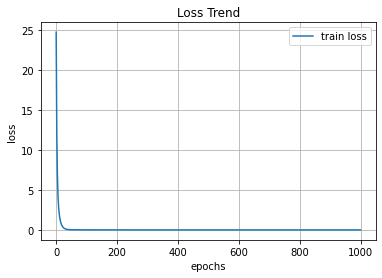

In [0]:
# 손실함수 출력

import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')

plt.show()

In [0]:
# 예측

test_data = np.array([ [5, 5], [2, 3], [-1, 0], [10, 5], [4, -1] ])

prediction_val = model.predict(test_data)

prediction_val

array([[ 9.999683  ],
       [ 5.0000215 ],
       [-0.99955297],
       [14.999413  ],
       [ 3.0002642 ]], dtype=float32)